# Παραδείγματα επίλυσης απλών παραδειγμάτων από τη στατική

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

import streng.teicm.statics.beams.uniformP as beam


Bad key savefig.frameon in file C:\Users\panagop\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\panagop\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\panagop\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlib

## Δοκός υπό συνεχή ομοιόμορφη φόρτιση

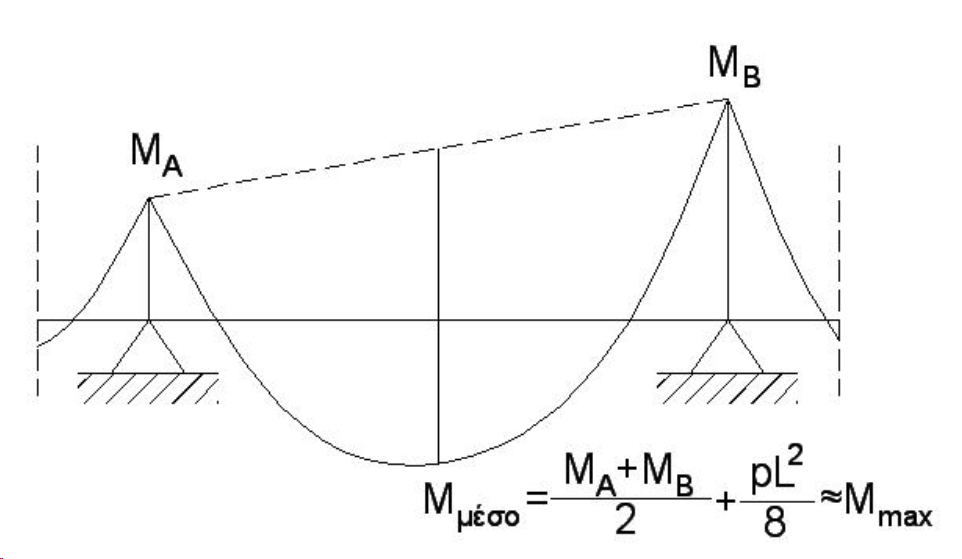

In [2]:
Image(filename='Mmeso.png', width=500)

Σε μια δοκό μήκος **L** που καταπονείται από συνεχή ομοιόμορφη φόρτιση **p**, αν οι ροπές στις στηρίξεις είναι $M_A$ και $M_B$, τότε η ροπή στο μέσο (που ισούται περίπου με τη μέγιστη τιμή) υπολογίζεται από τη σχέση:

$M_{AB,μέσο}=\dfrac{M_A+M_B}{2}+\dfrac{p\cdot L^2}{8}$

Η μέγιστη τιμή μπορεί να υπολογιστεί, αν πρώτα σχεδιαστεί το διάγραμμα των τεμνουσών

$V_A=\dfrac{p\cdot L}{2}+\dfrac{M_B-M_A}{L}$

$V_B=-\dfrac{p\cdot L}{2}+\dfrac{M_B-M_A}{L}$

$M_{AB,max} = M_A + \dfrac{V_A^2}{2p}= M_B + \dfrac{V_B^2}{2p}$

### Παράδειγμα υπολογισμού

In [3]:
MA = -100.0    # kNm
MB = -200.0    # kNm
p = 50.0       # kN/m
l = 6.5        # m

b = beam.Beam_uniformP_knownMs(MA=-100.0, MB=-200.0, p=50.0, l=6.5)
b.calc()
print(b)

MABμέσο = 114.06kNm
VA = 147.12kN
VB = -177.88kN
MABmax = 116.43kNm
MABmax = 116.43kNm (υπολογισμένο από δεξιά για επαλήθευση)


In [4]:
x = np.array([0, b.l/2, b.l])
y = np.array([b.MA, b.MABcenter, b.MB])
z = np.polyfit(x, y, 2)

α=z[0]
β=z[1]
γ=z[2]

# print(α)
# l = 3.25
# print(α * l * l + β * l + γ)

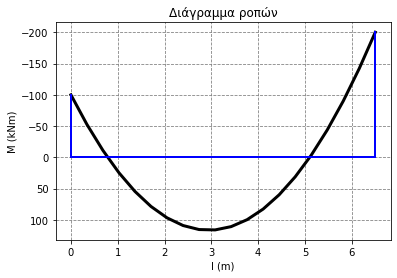

In [5]:
xs=np.linspace(0, l, 20)
ys=α * xs * xs + β * xs + γ

plt.plot(xs, ys, lw=3, color='black')
plt.plot(np.array([0., l]), np.array([0., 0.]), lw=2, color='blue')
plt.plot(np.array([0., 0.]), np.array([0., b.MA]), lw=2, color='blue')
plt.plot(np.array([l, l]), np.array([0., b.MB]), lw=2, color='blue')
plt.ylabel('M (kNm)') 
plt.xlabel('l (m)')   
plt.title('Διάγραμμα ροπών')
plt.gca().invert_yaxis()
plt.gca().grid(b=True, which='major', color='grey', linestyle='--')
plt.show()